## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16], bn_input=False):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    if bn_input:
        x = keras.layers.BatchNormalization()(input_layer)
    else:
        x = input_layer
    
    for idx, n in enumerate(num_neurons):
        if False and idx == 0:
            x = keras.layers.Dense(
                units=n, 
                activation="relu", 
                name="hidden_layer%d" % (idx))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(
                units=n, 
                activation="relu",
                name="hidden_layer%d" % (idx))(x)
            x = keras.layers.BatchNormalization()(x)
            
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 20
BATCH_SIZE = [16, 32, 64, 128, 256, 512]
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch size = %d" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "batchsize-%s-SGD" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batch size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)     

50000/50000 [==============================] - 7s 138us/step - loss: 1.4160 - acc: 0.4936 - val_loss: 1.5650 - val_acc: 0.4443
Epoch 19/20
50000/50000 [==============================] - 7s 142us/step - loss: 1.4095 - acc: 0.4971 - val_loss: 1.5853 - val_acc: 0.4331
Epoch 20/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.4023 - acc: 0.4991 - val_loss: 1.4838 - val_acc: 0.4694
Experiment with batch size = 64
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer1 (Dense)        (None,

50000/50000 [==============================] - 3s 56us/step - loss: 1.2963 - acc: 0.5389 - val_loss: 1.6370 - val_acc: 0.4286
Epoch 17/20
50000/50000 [==============================] - 3s 57us/step - loss: 1.2819 - acc: 0.5416 - val_loss: 1.5127 - val_acc: 0.4717
Epoch 18/20
50000/50000 [==============================] - 3s 57us/step - loss: 1.2721 - acc: 0.5506 - val_loss: 1.5532 - val_acc: 0.4654
Epoch 19/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.2651 - acc: 0.5464 - val_loss: 1.5302 - val_acc: 0.4660
Epoch 20/20
50000/50000 [==============================] - 3s 59us/step - loss: 1.2587 - acc: 0.5510 - val_loss: 1.6210 - val_acc: 0.4310
Experiment with batch size = 256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)    

50000/50000 [==============================] - 2s 40us/step - loss: 1.2894 - acc: 0.5389 - val_loss: 1.5059 - val_acc: 0.4725
Epoch 15/20
50000/50000 [==============================] - 2s 41us/step - loss: 1.2771 - acc: 0.5415 - val_loss: 1.5054 - val_acc: 0.4696
Epoch 16/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.2635 - acc: 0.5491 - val_loss: 1.5271 - val_acc: 0.4617
Epoch 17/20
50000/50000 [==============================] - 2s 40us/step - loss: 1.2533 - acc: 0.5506 - val_loss: 1.5429 - val_acc: 0.4639
Epoch 18/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.2447 - acc: 0.5534 - val_loss: 1.5352 - val_acc: 0.4623
Epoch 19/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.2343 - acc: 0.5582 - val_loss: 1.5550 - val_acc: 0.4590
Epoch 20/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.2272 - acc: 0.5591 - val_loss: 1.5855 - val_acc: 0.4489


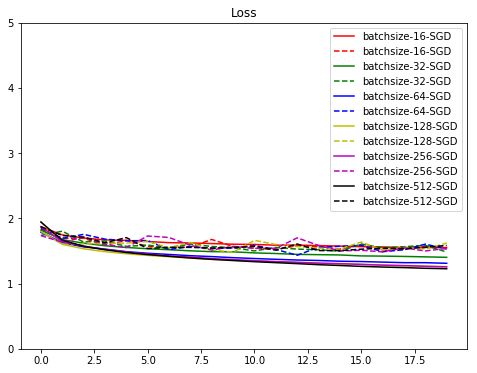

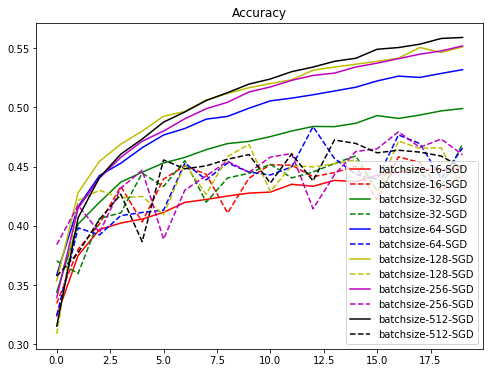

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with batch size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)     

Epoch 15/20
50000/50000 [==============================] - 10s 206us/step - loss: 1.2637 - acc: 0.5482 - val_loss: 1.3465 - val_acc: 0.5267
Epoch 16/20
50000/50000 [==============================] - 9s 176us/step - loss: 1.2622 - acc: 0.5509 - val_loss: 1.3428 - val_acc: 0.5192
Epoch 17/20
50000/50000 [==============================] - 9s 180us/step - loss: 1.2509 - acc: 0.5557 - val_loss: 1.3417 - val_acc: 0.5218
Epoch 18/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.2352 - acc: 0.5585 - val_loss: 1.3467 - val_acc: 0.5284
Epoch 19/20
50000/50000 [==============================] - 9s 182us/step - loss: 1.2315 - acc: 0.5632 - val_loss: 1.3386 - val_acc: 0.5281
Epoch 20/20
50000/50000 [==============================] - 9s 186us/step - loss: 1.2219 - acc: 0.5633 - val_loss: 1.3447 - val_acc: 0.5232
Experiment with batch size = 64
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


Epoch 11/20
50000/50000 [==============================] - 4s 86us/step - loss: 1.2001 - acc: 0.5716 - val_loss: 1.3781 - val_acc: 0.5127
Epoch 12/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.1790 - acc: 0.5796 - val_loss: 1.3830 - val_acc: 0.5140
Epoch 13/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.1624 - acc: 0.5851 - val_loss: 1.3784 - val_acc: 0.5133
Epoch 14/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.1492 - acc: 0.5894 - val_loss: 1.3685 - val_acc: 0.5192
Epoch 15/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.1328 - acc: 0.5967 - val_loss: 1.3861 - val_acc: 0.5099
Epoch 16/20
50000/50000 [==============================] - 5s 91us/step - loss: 1.1204 - acc: 0.5999 - val_loss: 1.3896 - val_acc: 0.5152
Epoch 17/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.1077 - acc: 0.6067 - val_loss: 1.4062 - val_acc: 0.5103
Epoch 18/20
50000/50000 [=========

50000/50000 [==============================] - 5s 92us/step - loss: 1.3286 - acc: 0.5263 - val_loss: 1.4245 - val_acc: 0.4954
Epoch 8/20
50000/50000 [==============================] - 5s 91us/step - loss: 1.2961 - acc: 0.5398 - val_loss: 1.4221 - val_acc: 0.4999
Epoch 9/20
50000/50000 [==============================] - 5s 91us/step - loss: 1.2620 - acc: 0.5511 - val_loss: 1.4213 - val_acc: 0.5038
Epoch 10/20
50000/50000 [==============================] - 4s 90us/step - loss: 1.2364 - acc: 0.5606 - val_loss: 1.4300 - val_acc: 0.5019
Epoch 11/20
50000/50000 [==============================] - 4s 90us/step - loss: 1.2162 - acc: 0.5662 - val_loss: 1.4252 - val_acc: 0.4995
Epoch 12/20
50000/50000 [==============================] - 5s 90us/step - loss: 1.1900 - acc: 0.5761 - val_loss: 1.4388 - val_acc: 0.4993
Epoch 13/20
50000/50000 [==============================] - 5s 92us/step - loss: 1.1707 - acc: 0.5803 - val_loss: 1.4359 - val_acc: 0.5003
Epoch 14/20
50000/50000 [=======================

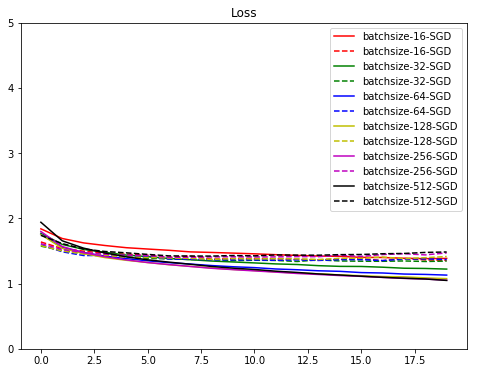

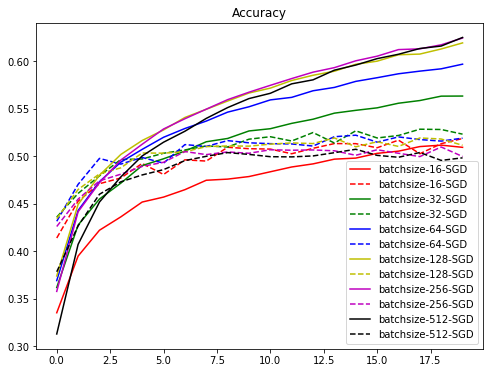

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch size = %d" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:], bn_input=True)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "batchsize-%s-SGD" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()